<a href="https://colab.research.google.com/github/jiho01/Self-driving_AI/blob/main/0715_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 하나 사진만 출력

In [4]:
!pip

ERROR: unknown command "torchvision"


In [9]:
import torch                 # 딥러닝 프레임워크, GPU 지원 및 자동 미분 기능
import torch.nn as nn        # 신경망 모듈(층, 활성화 등)
import torchvision.transforms as transforms   # 이미지 전처리(transform) 정의
import torchvision.models as models   # 다양한 사전 학습 모델 제공
from PIL import Image        # 이미지 파일 열기/변환용(Pillow)
import numpy as np           # 배열 및 수치 계산
import matplotlib.pyplot as plt  # 결과, 그래프 시각화
import requests              # 웹 요청(라벨 등 다운로드)
import json
from io import BytesIO       # 바이트스트림(이미지 로드용)
import cv2                   # 이미지 처리(OpenCV, 활용은 선택)

✅ 라이브러리 로드 완료!
🎯 ImageNet 1000개 클래스 분류기 실행 옵션:
1. 단일 이미지 분류: classify_uploaded_image()
2. 다중 모델 비교: compare_multiple_models()
3. 여러 이미지 일괄 분류: batch_classify()

💡 추천: classify_uploaded_image() 로 시작하세요!

🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등
📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리

⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!
🚀 ImageNet 1000개 클래스 분류기 시작!
📁 이미지를 업로드해주세요...
🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!


Saving 데이지.webp to 데이지.webp
📷 업로드된 파일: 데이지.webp
🧠 resnet50 모델 로딩 중...
💻 사용 디바이스: cpu
📋 ImageNet 라벨 로드 완료: 1000개
✅ resnet50 모델 준비 완료!
📊 분류 가능한 클래스: 1000개
🔍 이미지 분석 중...

🎯 ImageNet 분류 결과 (Top 5):
1. daisy                          99.73%
2. bee                            0.05%
3. ant                            0.03%
4. grasshopper                    0.01%
5. long-horned beetle             0.01%


/tmp/ipython-input-11-1949169201.py:193: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


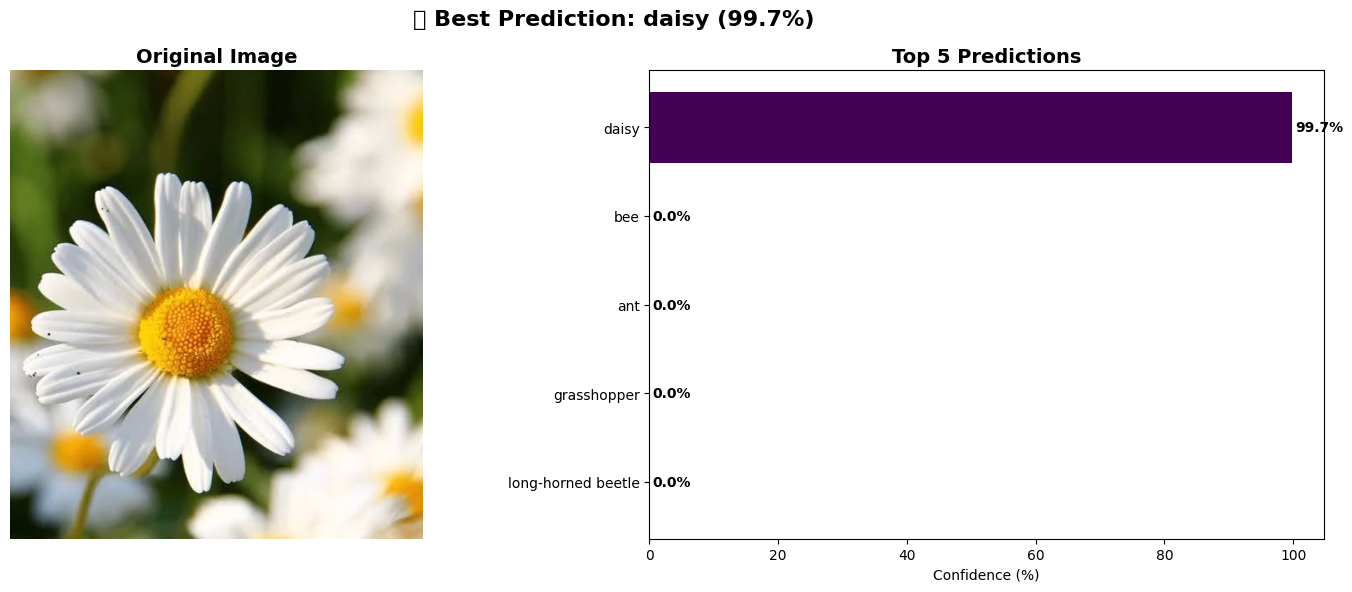


📊 모델 정보:
   🧠 모델: ResNet
   💻 디바이스: cpu
   📋 총 클래스 수: 1000

✅ ImageNet 분류 완료!


{'original_image': <PIL.Image.Image image mode=RGB size=488x554>,
 'predictions': [{'rank': 1,
   'class_index': 985,
   'class_name': 'daisy',
   'probability': 0.9972766041755676,
   'percentage': 99.72766041755676},
  {'rank': 2,
   'class_index': 309,
   'class_name': 'bee',
   'probability': 0.0004956449847668409,
   'percentage': 0.049564498476684093},
  {'rank': 3,
   'class_index': 310,
   'class_name': 'ant',
   'probability': 0.0003439396678004414,
   'percentage': 0.03439396678004414},
  {'rank': 4,
   'class_index': 311,
   'class_name': 'grasshopper',
   'probability': 8.613982936367393e-05,
   'percentage': 0.008613982936367393},
  {'rank': 5,
   'class_index': 303,
   'class_name': 'long-horned beetle',
   'probability': 7.57573070586659e-05,
   'percentage': 0.00757573070586659},
  {'rank': 6,
   'class_index': 308,
   'class_name': 'fly',
   'probability': 7.492941949749365e-05,
   'percentage': 0.0074929419497493654},
  {'rank': 7,
   'class_index': 720,
   'class_nam

In [11]:
print("✅ 라이브러리 로드 완료!")

# =============================================================================
# ImageNet 1000개 클래스 분류기
# =============================================================================

class ImageNetClassifier:
    """ImageNet 사전 훈련된 모델을 사용한 1000개 클래스 분류기"""

    def __init__(self, model_name='resnet50'): #선택 모델명으로 사전 훈련된 딥러닝 모델을 불러오고, 디바이스(GPU/CPU) 할당, 클래스명 로드, 이미지 전처리 파이프라인 지정
        print(f"🧠 {model_name} 모델 로딩 중...")
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 가능하면 GPU로, 아니면 CPU로
        print(f"💻 사용 디바이스: {self.device}")

        # 모델 로드
        self.model = self.load_model(model_name)
        self.model.eval()  # 평가 모드로 전환

        # ImageNet 클래스 라벨 로드
        self.class_labels = self.load_imagenet_labels() # 클래스별 영문 라벨 리스트 가져오기

        # 이미지 전처리 설정
        self.transform = transforms.Compose([ # 전처리: 리사이즈, 크롭, 정규화 등
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
        ])

        print(f"✅ {model_name} 모델 준비 완료!")
        print(f"📊 분류 가능한 클래스: 1000개")

    def load_model(self, model_name):
        """사전 훈련된 모델 로드"""
        models_dict = { # 지원하는 모델 딕셔너리
            'resnet50': models.resnet50(pretrained=True),
            'resnet101': models.resnet101(pretrained=True),
            'vgg16': models.vgg16(pretrained=True),
            'vgg19': models.vgg19(pretrained=True),
            'densenet121': models.densenet121(pretrained=True),
            'efficientnet_b0': models.efficientnet_b0(pretrained=True),
            'mobilenet_v2': models.mobilenet_v2(pretrained=True),
            'alexnet': models.alexnet(pretrained=True),
            'inception_v3': models.inception_v3(pretrained=True)
        }

        if model_name not in models_dict: # 모델명이 잘못되면 ResNet50으로 대체
            print(f"⚠️ {model_name} 모델을 찾을 수 없습니다. ResNet50을 사용합니다.")
            model_name = 'resnet50'

        model = models_dict[model_name]
        return model.to(self.device) # 디바이스에 모델 할당(GPU/CPU)

    def load_imagenet_labels(self):
        """ImageNet 1000개 클래스 라벨 로드(온라인에서 1000개 클래스 라벨명을 받아 옴. 실패 시 임시 라벨 목록 생성)"""
        try:
            # ImageNet 클래스 라벨 다운로드
            url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt" # 1000 클래스 라벨이 저장된 텍스트 파일
            response = requests.get(url)
            labels = response.text.strip().split('\n')  # 각 줄을 클래스 라벨로 사용
            print(f"📋 ImageNet 라벨 로드 완료: {len(labels)}개")
            return labels  # 1000개 라벨명 반환
        except:
            print("⚠️ 온라인 라벨 로드 실패. 기본 라벨을 사용합니다.")
            # 일부 주요 클래스만 포함한 기본 라벨
            return [f"class_{i}" for i in range(1000)]

    def load_image(self, image_source):
        """이미지 로드 (파일 경로 또는 URL)"""
        try:
            if isinstance(image_source, str):
                if image_source.startswith('http'):
                    # URL에서 이미지 다운로드(불러오기)
                    response = requests.get(image_source)
                    image = Image.open(BytesIO(response.content)).convert('RGB') # 로컬 파일에서 오픈 및 RGB로 변환
                else:
                    # 로컬 파일
                    image = Image.open(image_source).convert('RGB')
            else:
                # PIL Image 객체
                image = image_source.convert('RGB')

            return image
        except Exception as e:
            print(f"❌ 이미지 로드 실패: {e}")
            return None

    def preprocess_image(self, image):
        """이미지 전처리 : 리사이즈 → 센터 크롭 → 정규화 → 텐서 변환"""
        if image is None:
            return None

        # PIL Image → Tensor
        tensor = self.transform(image).unsqueeze(0)  # 배치 차원 추가, 4차원 텐서로 변환
        return tensor.to(self.device)

    def predict(self, image_source, top_k=5):
        """이미지를 입력받아 분류 예측"""
        print(f"🔍 이미지 분석 중...")

        # 이미지 로드
        image = self.load_image(image_source)
        if image is None:
            return None

        original_image = image.copy()

        # 전처리
        input_tensor = self.preprocess_image(image)
        if input_tensor is None:
            return None

        # 예측
        with torch.no_grad():
            outputs = self.model(input_tensor) # 모델 추론 실행
            probabilities = torch.nn.functional.softmax(outputs[0], dim=0) # 소프트맥스 확률화

        # Top-K 결과 추출
        top_prob, top_indices = torch.topk(probabilities, top_k) # 확률 상위 top_k 클래스 및 확률 추출

        results = []
        for i in range(top_k):
            class_idx = top_indices[i].item()
            prob = top_prob[i].item()
            class_name = self.class_labels[class_idx]
            results.append({ # 랭크, 클래스 인덱스, 이름, 확률 저장
                'rank': i + 1,
                'class_index': class_idx,
                'class_name': class_name,
                'probability': prob,
                'percentage': prob * 100
            })

        return { # 원본 이미지, 예측 결과, 모델 정보 반환
            'original_image': original_image,
            'predictions': results,
            'model_info': {
                'model_name': self.model.__class__.__name__,
                'device': str(self.device),
                'total_classes': len(self.class_labels)
            }
        }

    def visualize_results(self, results, show_top_k=5):
        """예측 결과 표 형식으로 출력, 이미지와 예측결과 바 그래프 시각화"""
        if results is None:
            print("❌ 결과가 없습니다.")
            return

        # 결과 출력
        print(f"\n🎯 ImageNet 분류 결과 (Top {show_top_k}):")
        print("=" * 60)

        predictions = results['predictions'][:show_top_k]

        for pred in predictions:
            print(f"{pred['rank']}. {pred['class_name']:<30} {pred['percentage']:.2f}%")

        print("=" * 60)

        # 시각화
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) # 원본 이미지와 예측 결과 비교

        # 원본 이미지
        ax1.imshow(results['original_image'])
        ax1.set_title('Original Image', fontsize=14, fontweight='bold')
        ax1.axis('off')

        # 예측 결과 막대 그래프
        class_names = [pred['class_name'][:20] for pred in predictions]  # 이름 길이 제한
        probabilities = [pred['percentage'] for pred in predictions]
        colors = plt.cm.viridis(np.linspace(0, 1, len(predictions)))

        bars = ax2.barh(range(len(predictions)), probabilities, color=colors) # 확률을 바 형식으로 시각화
        ax2.set_yticks(range(len(predictions)))
        ax2.set_yticklabels(class_names) # 클래스명 출력
        ax2.set_xlabel('Confidence (%)')
        ax2.set_title(f'Top {show_top_k} Predictions', fontsize=14, fontweight='bold')
        ax2.invert_yaxis()  # 높은 확률이 위로

        # 막대에 퍼센트 표시
        for i, (bar, prob) in enumerate(zip(bars, probabilities)):
            ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                    f'{prob:.1f}%', va='center', fontweight='bold')

        # 전체 제목
        best_prediction = predictions[0]
        plt.suptitle(f'🏆 Best Prediction: {best_prediction["class_name"]} ({best_prediction["percentage"]:.1f}%)',
                      fontsize=16, fontweight='bold')
        # 최상위 예측 결과 강조

        plt.tight_layout()
        plt.show()

        # 모델 정보
        model_info = results['model_info']
        print(f"\n📊 모델 정보:")
        print(f"   🧠 모델: {model_info['model_name']}")
        print(f"   💻 디바이스: {model_info['device']}")
        print(f"   📋 총 클래스 수: {model_info['total_classes']}")

    def compare_models(self, image_source, model_names=['resnet50', 'vgg16', 'efficientnet_b0']):
        """여러 모델로 동일 이미지를 각각 성능 비교 및 시각화"""
        print(f"🔄 다중 모델 비교 시작...")

        original_model = self.model
        original_name = original_model.__class__.__name__

        results_comparison = []

        for model_name in model_names: # 각 모델에 대해 순차적으로 추론
            print(f"\n🧠 {model_name} 모델로 예측 중...")

            # 모델 변경
            self.model = self.load_model(model_name) # 동적으로 모델 변경
            self.model.eval()

            # 예측
            result = self.predict(image_source, top_k=3)
            if result:
                best_pred = result['predictions'][0]
                results_comparison.append({ # 모델별 가장 높은 예측 저장
                    'model_name': model_name,
                    'best_class': best_pred['class_name'],
                    'confidence': best_pred['percentage'],
                    'top3': result['predictions']
                })

        # 원래 모델 복원
        self.model = original_model

        # 비교 결과 시각화
        if results_comparison:
            self.visualize_model_comparison(results_comparison, image_source)

        return results_comparison

    def visualize_model_comparison(self, results_comparison, image_source):
        """여러 모델 비교 결과 시각화"""
        # 이미지 로드
        image = self.load_image(image_source)

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 4개 영역: 원본, bar, 테이블, 텍스트 비교

        # 원본 이미지
        axes[0, 0].imshow(image)
        axes[0, 0].set_title('Original Image', fontsize=14, fontweight='bold')
        axes[0, 0].axis('off')

        # 각 모델별 Top 1 결과
        model_names = [result['model_name'] for result in results_comparison]
        confidences = [result['confidence'] for result in results_comparison]
        predictions = [result['best_class'][:15] for result in results_comparison]  # 이름 단축

        colors = ['red', 'blue', 'green', 'orange', 'purple'][:len(model_names)]

        bars = axes[0, 1].bar(model_names, confidences, color=colors, alpha=0.7)  # 모델별 최고 확률 바
        axes[0, 1].set_title('Model Confidence Comparison', fontsize=14, fontweight='bold')
        axes[0, 1].set_ylabel('Confidence (%)')
        axes[0, 1].tick_params(axis='x', rotation=45)

        # 막대에 예측 클래스와 확률 표시
        for bar, pred, conf in zip(bars, predictions, confidences):
            axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                           f'{pred}\n{conf:.1f}%', ha='center', va='bottom', fontsize=10)

        # 상세 비교 테이블
        axes[1, 0].axis('off')
        table_data = []
        for result in results_comparison:
            row = [result['model_name'], result['best_class'][:20], f"{result['confidence']:.1f}%"]
            table_data.append(row)

        table = axes[1, 0].table(cellText=table_data,
                                colLabels=['Model', 'Best Prediction', 'Confidence'],
                                cellLoc='center',
                                loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.5)
        axes[1, 0].set_title('Detailed Comparison', fontsize=14, fontweight='bold')

        # 모델별 Top 3 비교
        axes[1, 1].axis('off')
        y_pos = 0.9
        for result in results_comparison:
            axes[1, 1].text(0.05, y_pos, f"🧠 {result['model_name']}:", fontweight='bold', fontsize=12)
            y_pos -= 0.08
            for i, pred in enumerate(result['top3']):
                axes[1, 1].text(0.1, y_pos, f"{i+1}. {pred['class_name'][:25]} ({pred['percentage']:.1f}%)",
                               fontsize=10)
                y_pos -= 0.06
            y_pos -= 0.02

        axes[1, 1].set_xlim(0, 1)
        axes[1, 1].set_ylim(0, 1)
        axes[1, 1].set_title('Top 3 Predictions per Model', fontsize=14, fontweight='bold')

        plt.tight_layout()
        plt.show()

# =============================================================================
# 실행 함수들
# =============================================================================

def classify_uploaded_image():
    """파일 업로드 후 ImageNet 분류"""
    print("🚀 ImageNet 1000개 클래스 분류기 시작!")
    print("=" * 60)

    # 파일 업로드
    print("📁 이미지를 업로드해주세요...")
    print("🎯 1000개 클래스 중에서 가장 유사한 객체를 찾아드립니다!")

    from google.colab import files
    uploaded = files.upload() # Colab 파일 업로드

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 분류기 생성
        classifier = ImageNetClassifier(model_name='resnet50') # 분류기 인스턴스 생성

        # 예측
        results = classifier.predict(filename, top_k=10) # 예측

        # 결과 시각화
        classifier.visualize_results(results, show_top_k=5) # 시각화

        print("\n✅ ImageNet 분류 완료!")
        return results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def compare_multiple_models():
    """여러 모델로 동일 이미지 비교"""
    print("🔄 다중 모델 성능 비교!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    filename = list(uploaded.keys())[0]
    print(f"📷 업로드된 파일: {filename}")

    try:
        # 분류기 생성
        classifier = ImageNetClassifier()

        # 여러 모델 비교
        models_to_compare = ['resnet50', 'vgg16', 'efficientnet_b0', 'mobilenet_v2']  #비교 대상 모델 리스트
        comparison_results = classifier.compare_models(filename, models_to_compare)

        print("\n✅ 다중 모델 비교 완료!")
        return comparison_results

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

def batch_classify():
    """여러 이미지 일괄 업로드 분류"""
    print("📁 여러 이미지 일괄 분류!")
    print("=" * 60)

    from google.colab import files
    uploaded = files.upload()

    if not uploaded:
        print("❌ 파일이 업로드되지 않았습니다!")
        return None

    try:
        classifier = ImageNetClassifier()
        results_list = []

        for filename in uploaded.keys(): #여러 파일 반복
            print(f"\n🔍 {filename} 분석 중...")
            results = classifier.predict(filename, top_k=5)

            if results:
                # 간단한 결과 출력
                best_pred = results['predictions'][0]
                print(f"🏆 {filename}: {best_pred['class_name']} ({best_pred['percentage']:.1f}%)")
                results_list.append((filename, best_pred['class_name'], best_pred['percentage'])) #간단 결과 저장 및 마지막 요약

        # 전체 결과 요약
        print(f"\n{'='*60}")
        print("📋 일괄 분류 결과 요약")
        print(f"{'='*60}")
        for filename, pred_class, confidence in results_list:
            print(f"📷 {filename:25} → {pred_class:20} ({confidence:.1f}%)")

        return results_list

    except Exception as e:
        print(f"❌ 오류 발생: {e}")
        return None

# =============================================================================
# 메인 실행 부분
# =============================================================================

print("🎯 ImageNet 1000개 클래스 분류기 실행 옵션:")
print("1. 단일 이미지 분류: classify_uploaded_image()")
print("2. 다중 모델 비교: compare_multiple_models()")
print("3. 여러 이미지 일괄 분류: batch_classify()")
print("\n💡 추천: classify_uploaded_image() 로 시작하세요!")
print("\n🧠 사용 가능한 모델: ResNet50, VGG16, EfficientNet, MobileNet 등")
print("📊 분류 가능: 동물, 차량, 음식, 도구, 자연물 등 1000개 카테고리")
print("\n⚡ 준비 완료! 업로드 전용 ImageNet 분류기입니다!")

# 사용자가 직접 함수 호출
classify_uploaded_image()